In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
data = pd.read_csv("/incendioD3/data/raw/bdqueimadas_2026-02-24_2026-02-25.csv", sep=",")

data.head(10)

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,FRP,Latitude,Longitude
0,2026/02/24 00:00:00,GOES-19,Brasil,RORAIMA,CANTÁ,Amazônia,8.0,0.00,0.40,64.1,1.92370,-60.36390
1,2026/02/24 00:00:00,GOES-19,Brasil,RORAIMA,CARACARAÍ,Amazônia,7.0,0.00,0.35,62.3,1.83210,-60.61140
2,2026/02/24 00:00:00,GOES-19,Brasil,RORAIMA,CANTÁ,Amazônia,6.0,0.32,0.30,53.5,2.23330,-60.70180
3,2026/02/24 00:00:00,GOES-19,Brasil,RORAIMA,BONFIM,Amazônia,11.0,0.00,0.98,54.1,2.70870,-60.25880
4,2026/02/24 00:00:00,GOES-19,Brasil,RORAIMA,CANTÁ,Amazônia,7.0,0.00,0.41,153.5,1.94190,-60.36370
5,2026/02/24 00:00:00,GOES-19,Brasil,RORAIMA,BONFIM,Amazônia,10.0,0.00,0.88,92.1,2.70880,-60.23980
6,2026/02/24 00:00:00,GOES-19,Brasil,RORAIMA,CANTÁ,Amazônia,7.0,0.00,0.41,48.4,1.94190,-60.34470
7,2026/02/24 00:05:00,TERRA_M-M,Brasil,ALAGOAS,PARIPUEIRA,Mata Atlântica,-999.0,0.00,0.71,40.0,-9.46823,-35.59460
8,2026/02/24 00:05:00,TERRA_M-M,Brasil,ALAGOAS,MACEIÓ,Mata Atlântica,-999.0,0.00,0.93,35.5,-9.47477,-35.58818
9,2026/02/24 00:07:00,TERRA_M-M,Brasil,MARANHÃO,BOM JESUS DAS SELVAS,Amazônia,2.0,4.61,0.03,14.0,-4.73916,-46.65635


In [18]:
data = data.drop("Satelite", axis=1)
data = data.drop("Pais", axis=1)
data = data.drop("Municipio", axis=1)
data = data.drop("DataHora", axis=1)

data.head(10)

,Estado,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,FRP,Latitude,Longitude
0,RORAIMA,Amazônia,8.0,0.00,0.40,64.1,1.92370,-60.36390
1,RORAIMA,Amazônia,7.0,0.00,0.35,62.3,1.83210,-60.61140
2,RORAIMA,Amazônia,6.0,0.32,0.30,53.5,2.23330,-60.70180
3,RORAIMA,Amazônia,11.0,0.00,0.98,54.1,2.70870,-60.25880
4,RORAIMA,Amazônia,7.0,0.00,0.41,153.5,1.94190,-60.36370
5,RORAIMA,Amazônia,10.0,0.00,0.88,92.1,2.70880,-60.23980
6,RORAIMA,Amazônia,7.0,0.00,0.41,48.4,1.94190,-60.34470
7,ALAGOAS,Mata Atlântica,-999.0,0.00,0.71,40.0,-9.46823,-35.59460
8,ALAGOAS,Mata Atlântica,-999.0,0.00,0.93,35.5,-9.47477,-35.58818
9,MARANHÃO,Amazônia,2.0,4.61,0.03,14.0,-4.73916,-46.65635


In [19]:
data.to_csv("/incendioD3/data/processed/processedbdqueimadas.csv", sep=",")

In [20]:
estados = data["Estado"].unique()

print(estados)

<StringArray>
[            'RORAIMA',             'ALAGOAS',            'MARANHÃO',
          'PERNAMBUCO',             'PARAÍBA',             'SERGIPE',
               'BAHIA',               'CEARÁ', 'RIO GRANDE DO NORTE',
           'SÃO PAULO',  'MATO GROSSO DO SUL',               'PIAUÍ',
           'TOCANTINS',                'PARÁ',              'PARANÁ',
        'MINAS GERAIS',         'MATO GROSSO',            'AMAZONAS',
            'RONDÔNIA',   'RIO GRANDE DO SUL',                'ACRE',
      'RIO DE JANEIRO',      'ESPÍRITO SANTO',      'SANTA CATARINA']
Length: 24, dtype: str


In [21]:
dataEstados = data["Estado"].value_counts().reset_index()
dataEstados.columns = ["Estado", "Total de Focos"]

dataEstados.sort_values("Total de Focos", ascending=True)

dataEstados.head()

,Estado,Total de Focos
0,RORAIMA,1894
1,ALAGOAS,171
2,PERNAMBUCO,137
3,PARAÍBA,46
4,BAHIA,46


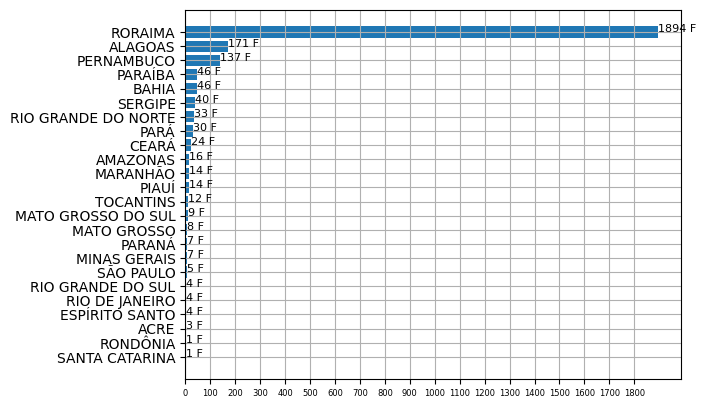

In [22]:
plt.Figure(figsize=(16,9))
plt.barh(dataEstados["Estado"],dataEstados["Total de Focos"])
plt.grid(True)
plt.xticks(np.arange(0, 1900, 100), fontsize=6)
plt.gca().invert_yaxis()

for i, value in enumerate(dataEstados["Total de Focos"]):
    plt.text(value, i, f"{value} F", fontsize=8)


In [23]:
dataBiomas = data["Bioma"].value_counts().reset_index()
dataBiomas.columns =["Bioma", "Total de Focos"]

dataBiomas.head()

,Bioma,Total de Focos
0,Amazônia,1956
1,Caatinga,303
2,Mata Atlântica,213
3,Cerrado,53
4,Pampa,4


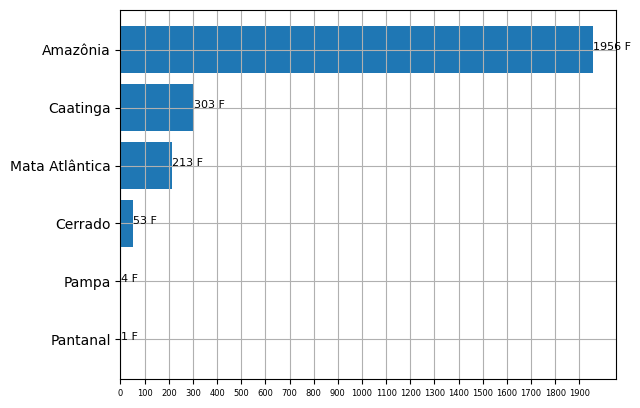

In [24]:
plt.Figure(figsize=(16,9))
plt.barh(dataBiomas["Bioma"], dataBiomas["Total de Focos"])
plt.grid(True)
plt.xticks(np.arange(0, 2000, 100), fontsize=6)
plt.gca().invert_yaxis()

for i, value in enumerate(dataBiomas["Total de Focos"]):
    plt.text(value, i, f"{value} F", fontsize=8)

Mapa de Focos

In [25]:
import folium as fl

mapa = fl.Map(location=[-13.072965, -52.431161], zoom_start=4)

coords = list(zip(data.Latitude, data.Longitude))

for i in coords:
    fl.Marker(
        location= i,
        icon=fl.Icon(icon="fire", color="red")
    ).add_to(mapa)

mapa.save("/incendioD3/maps/fireMap.html")

In [35]:
dataHeatMap = dataEstados

for estado in estados:
    coords = []

    coords = data.loc[data["Estado"] == estado, "Latitude"]
    coords = coords.to_list()
    coordsMean = np.mean(coords)
    dataHeatMap.loc[dataHeatMap["Estado"] == estado, "Latitude"] = coordsMean

    coords = data.loc[data["Estado"] == estado, "Longitude"]
    coords = coords.to_list()
    coordsMean = np.mean(coords)
    dataHeatMap.loc[dataHeatMap["Estado"] == estado, "Longitude"] = coordsMean

dataHeatMap.head()

,Estado,Total de Focos,Latitude,Longitude
0,RORAIMA,1894,2.289742,-60.266439
1,ALAGOAS,171,-9.713413,-36.448986
2,PERNAMBUCO,137,-8.555981,-36.623241
3,PARAÍBA,46,-6.773805,-36.595883
4,BAHIA,46,-11.406943,-39.913885


In [39]:
from folium.plugins import HeatMap

heatMap = fl.Map(location=[-13.072965, -52.431161], zoom_start=4)
coords = list(zip(dataHeatMap.Latitude, dataHeatMap.Longitude, dataHeatMap["Total de Focos"]))
hm = HeatMap(coords, radius=50, blur=50)
heatMap.add_child(hm)

heatMap

heatMap.save("/incendioD3/maps/heatMao.html")
